# Лабораторная работа №6
## ПРИМЕНЕНИЕ ВЕЙВЛЕТ МЕТОДОВ ДЛЯ АНАЛИЗА ВРЕМЕННЫХ РЯДОВ
### Цыпаев Владимир Николаевич
### Вариант: 12
### Группа: РИМ-181228

Вейвлет-преобразование очень похоже по своему характеру на
преобразование Фурье, поэтому и методика его использования напоминает
алгоритмы анализа ВР спектральными методами. Главное отличие этих двух
преобразований заключается в том, что преобразование Фурье использует в
качестве базиса гармонические функции фиксированной частоты, а вот
вейвлет-преобразование – целый класс различных базисных функций
различного масштаба и локализации по времени. Наличие этих двух
параметров позволяют «развернуть» свойства процесса одновременно и в
частотной, и во временной областях. Поэтому подобный тип методов
называют средством частотно-временной локализации особенностей ряда.

In [1001]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import pywt
%matplotlib inline

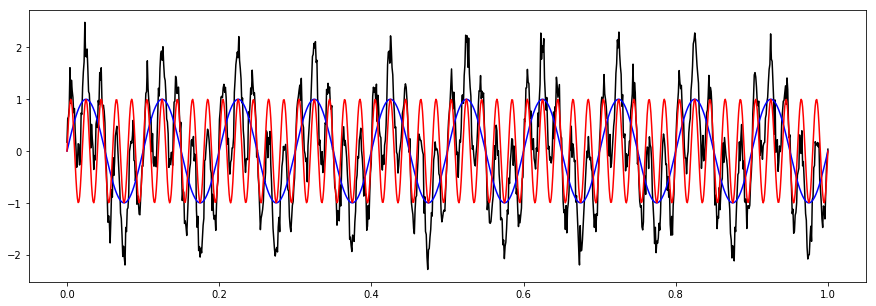

In [1002]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50

F = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)\
    +0.2*rand.randn(len(t))

plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

http://wavelets.pybytes.com

- Декомпозиция с помощью дискретных вейвлетов происходит до определенного уровня (__level__), ограниченного размером доступных данных.
- По краям временного интервала вейвлет может по-разному трактовать конструируемые точки для экстраполяции (__mode__): простое дополнение нулями, константами, симметрично/асимметрично, периодически и т.д. В зависимости от вида исходных данных, лучше подходит тот или иной режим.
- Декомпозиция всегда происходит в виде комбинации коэффициентов __Аппроксимации__ (cA) плюс __Детали__ (cD). Всегда есть одна аппроксимация, а число деталей равно уровню декомпозиции. Меняя выбор группировки коэффициентов аппроксимации и деталей, будут меняться восстановленные компоненты и соответствующая декомпозиция ряда.

In [1003]:
list(zip(pywt.families(short=True), pywt.families(short=False)))

[('haar', 'Haar'),
 ('db', 'Daubechies'),
 ('sym', 'Symlets'),
 ('coif', 'Coiflets'),
 ('bior', 'Biorthogonal'),
 ('rbio', 'Reverse biorthogonal'),
 ('dmey', 'Discrete Meyer (FIR Approximation)'),
 ('gaus', 'Gaussian'),
 ('mexh', 'Mexican hat wavelet'),
 ('morl', 'Morlet wavelet'),
 ('cgau', 'Complex Gaussian wavelets'),
 ('shan', 'Shannon wavelets'),
 ('fbsp', 'Frequency B-Spline wavelets'),
 ('cmor', 'Complex Morlet wavelets')]

## dmey
вейвлет Мейера
http://wavelets.pybytes.com/wavelet/dmey/

In [1004]:
wvlt_dmey = pywt.Wavelet('dmey')

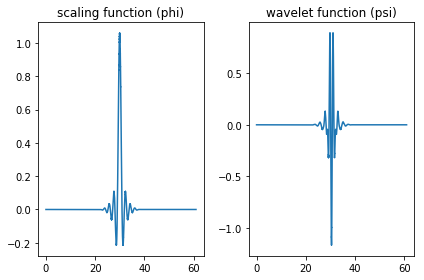

In [1005]:
wavelet = wvlt_dmey
data = wavelet.wavefun(10)

funcs, x = data[:-1], data[-1]
labels = ["scaling function (phi)", "wavelet function (psi)"]
fig = plt.figure()
for i, (d, label) in enumerate(zip(funcs, labels)):
    ax = fig.add_subplot((len(data) - 1) // 2, 2, 1 + i)
    ax.plot(x, d)
    ax.set_title(label)
plt.tight_layout()
plt.show()

In [1006]:
print(wvlt_dmey)

Wavelet dmey
  Family name:    Discrete Meyer (FIR Approximation)
  Short name:     dmey
  Filters length: 62
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False


In [1007]:
pywt.dwt_max_level(len(F), wvlt_dmey)

4

### dmey level 4
Разобьем наш исходный ряд на компоненты с помощью вейвлета
Мейера, в режиме периодизации, до 4 уровня декомпозиции:

In [1008]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt_dmey, mode='periodization', level=4)

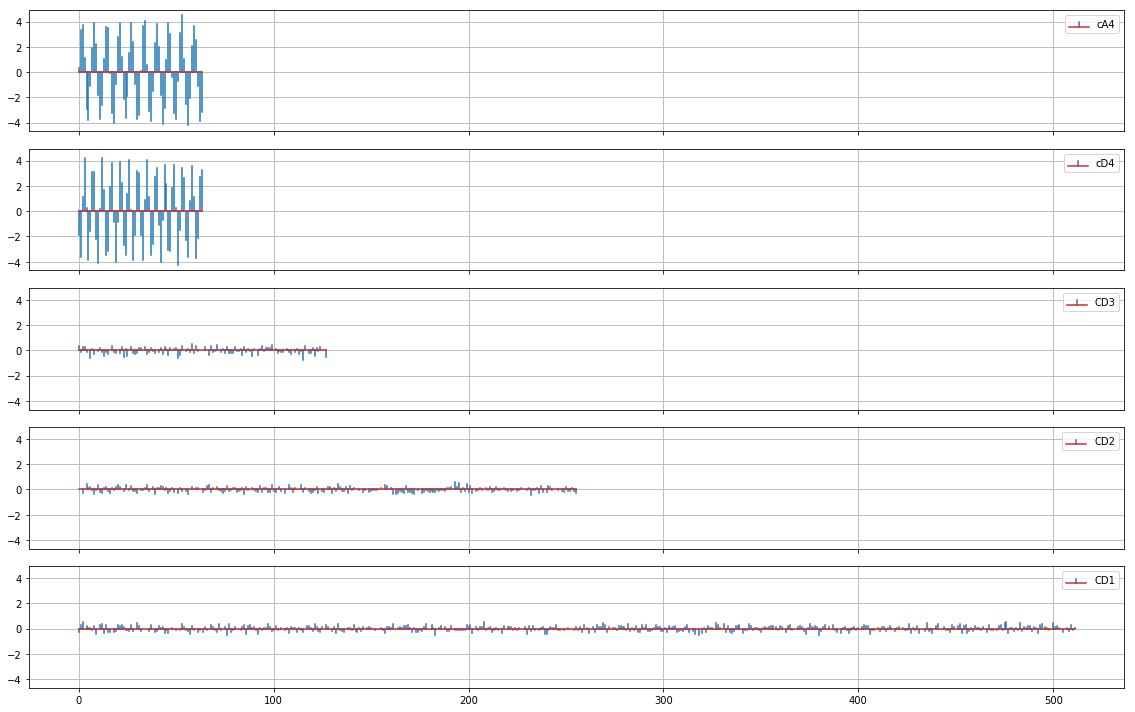

In [1009]:
fig, ax = plt.subplots(5, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].stem(cA4, label = 'cA4', markerfmt=' ')
ax[1].stem(cD4, label = 'cD4', markerfmt=' ')
ax[2].stem(cD3, label = 'CD3', markerfmt=' ')
ax[3].stem(cD2, label = 'CD2' ,markerfmt=' ')
ax[4].stem(cD1, label = 'CD1', markerfmt=' ')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.tight_layout()
plt.show()

В результате декомпозиции получаются не новые временные ряды, а только вейвлет-коэффициенты декомпозиции.


Восстановим две периодики исходного модельного ряда:

In [1010]:
Fre1 = pywt.waverec((cA4, None, None, None, None), wvlt_dmey, mode='periodization')
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt_dmey, mode='periodization')

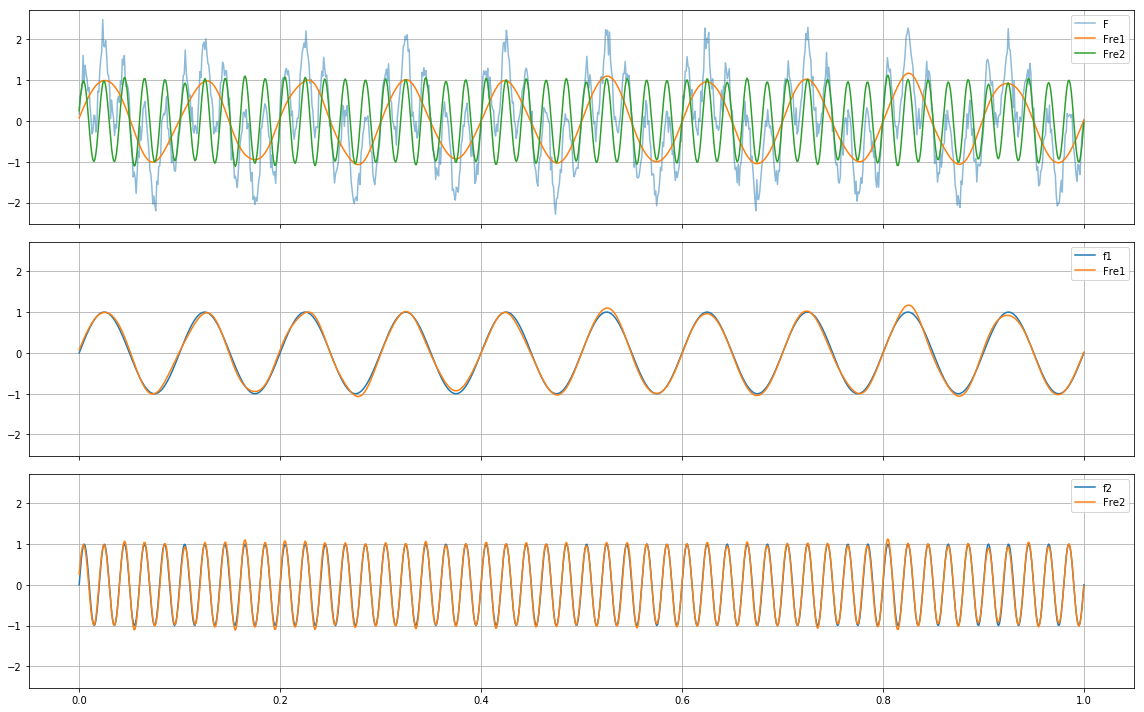

In [1011]:
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, Fre1, label = 'Fre1')
ax[0].plot(t, Fre2, label = 'Fre2')

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, Fre1, label = 'Fre1')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, Fre2, label = 'Fre2')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()
plt.show()

### dmey level 3
Проведите аналогичную декомпозицию для 3 уровня (level = 3). Вейвлет не меняйте. Сравните полученные результаты.

In [1012]:
cA3, cD3, cD2, cD1 = pywt.wavedec(F, wvlt_dmey, mode='periodization', level=3)
Fre1 = pywt.waverec((cA3, None, None, None), wvlt_dmey, mode='periodization')
Fre2 = pywt.waverec((None, cD3, None, None), wvlt_dmey, mode='periodization')

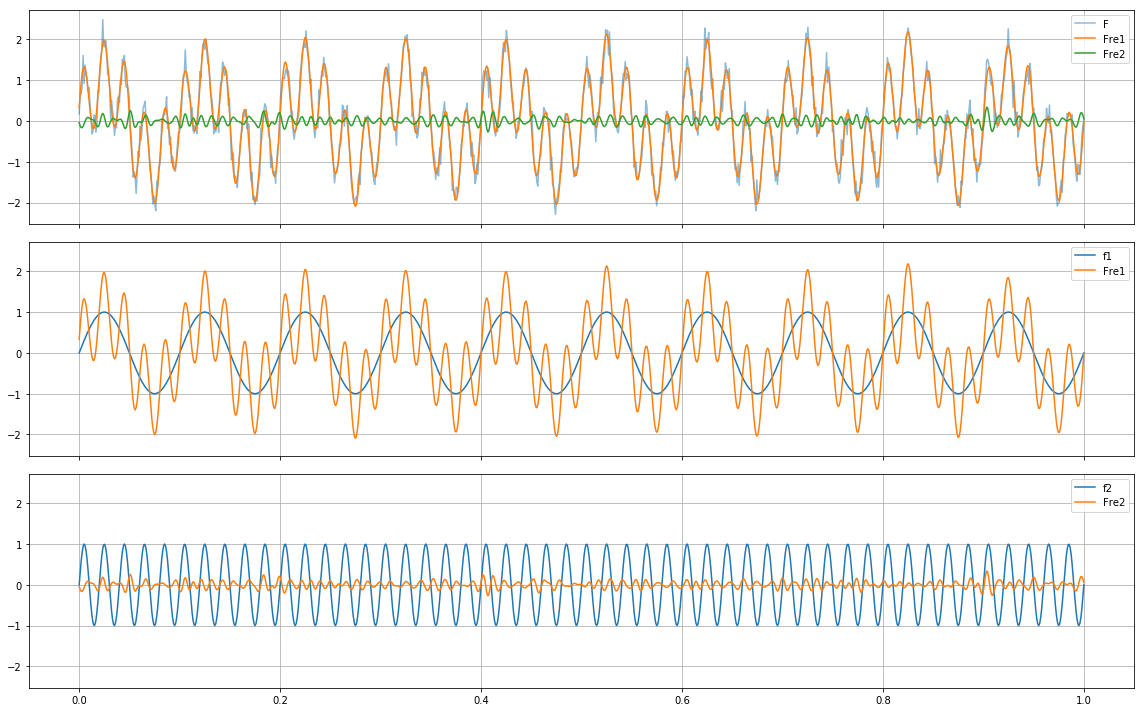

In [1013]:
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, Fre1, label = 'Fre1')
ax[0].plot(t, Fre2, label = 'Fre2')

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, Fre1, label = 'Fre1')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, Fre2, label = 'Fre2')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.tight_layout()
plt.show()

## db6
http://wavelets.pybytes.com/wavelet/coif5/

In [1014]:
wvlt_db6 = pywt.Wavelet('db6')

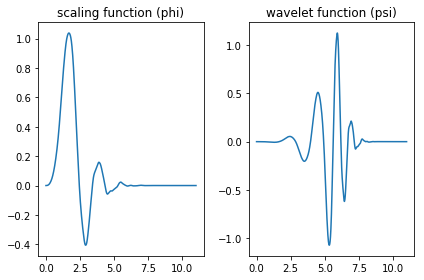

In [1015]:
wavelet = wvlt_db6
data = wavelet.wavefun(10)

funcs, x = data[:-1], data[-1]
labels = ["scaling function (phi)", "wavelet function (psi)"]
fig = plt.figure()
for i, (d, label) in enumerate(zip(funcs, labels)):
    ax = fig.add_subplot((len(data) - 1) // 2, 2, 1 + i)
    ax.plot(x, d)
    ax.set_title(label)
    
plt.tight_layout()
plt.show()

In [1016]:
print(wvlt_db6)

Wavelet db6
  Family name:    Daubechies
  Short name:     db
  Filters length: 12
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [1017]:
pywt.dwt_max_level(len(F), wvlt_db6)

6

### db6 level 5

In [1018]:
cA5, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt_db6, mode='periodization', level=5)

In [1019]:
Fre1 = pywt.waverec((cA5, None, None, None, None, None), wvlt_db6, mode='periodization')
Fre2 = pywt.waverec((None, cD5, cD4, None, None, None), wvlt_db6, mode='periodization')

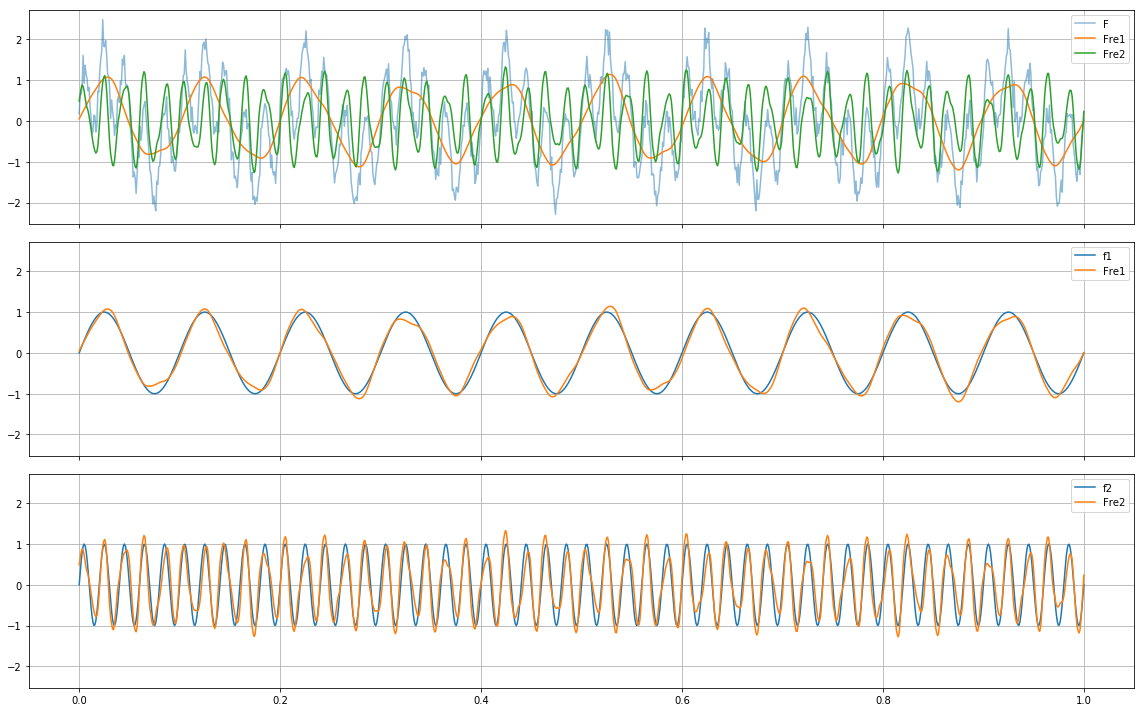

In [1020]:
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, Fre1, label = 'Fre1')
ax[0].plot(t, Fre2, label = 'Fre2')

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, Fre1, label = 'Fre1')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, Fre2, label = 'Fre2')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()
plt.show()

# Stationary Wavelet Transform = SWT
Стационарное Вейвлет Преобразование 

Этот метод дает гораздо большие возможности
декомпозиции по уровню и по комбинации аппроксимаций и деталей:
## dmey

In [1021]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt_dmey, level=5)

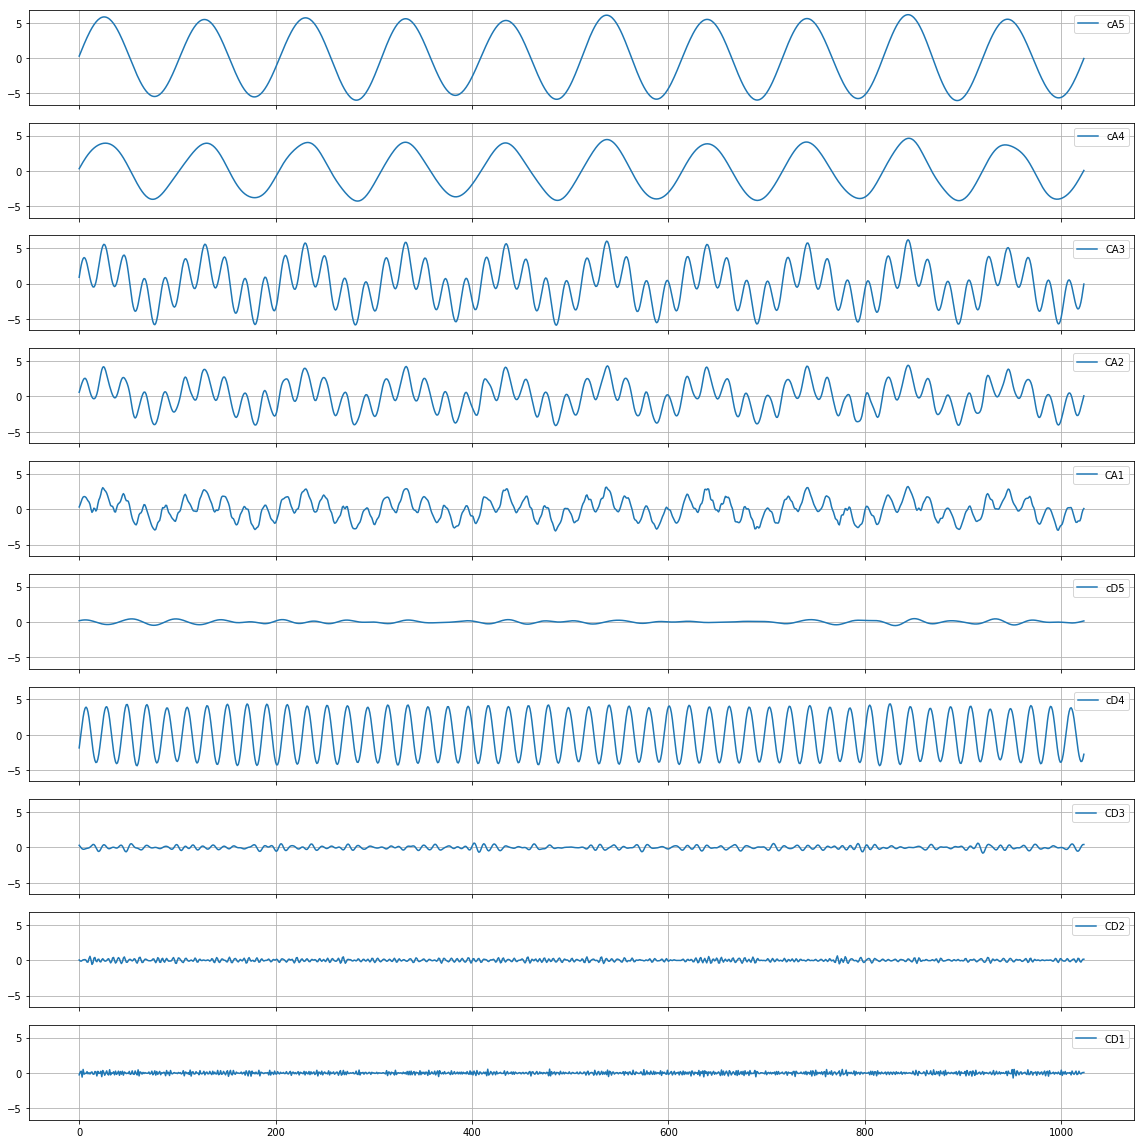

In [1022]:
fig, ax = plt.subplots(10, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA5, label = 'cA5')
ax[1].plot(cA4, label = 'cA4')
ax[2].plot(cA3, label = 'CA3')
ax[3].plot(cA2, label = 'CA2')
ax[4].plot(cA1, label = 'CA1')
ax[5].plot(cD5, label = 'cD5')
ax[6].plot(cD4, label = 'cD4')
ax[7].plot(cD3, label = 'CD3')
ax[8].plot(cD2, label = 'CD2')
ax[9].plot(cD1, label = 'CD1')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()
ax[8].grid()
ax[9].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()
ax[9].legend()


plt.tight_layout()
plt.show()

In [1023]:
rr1 = pywt.iswt([(cA5, cD5)], wvlt_dmey)
rr2 = pywt.iswt([(cD4, cD3)], wvlt_dmey)

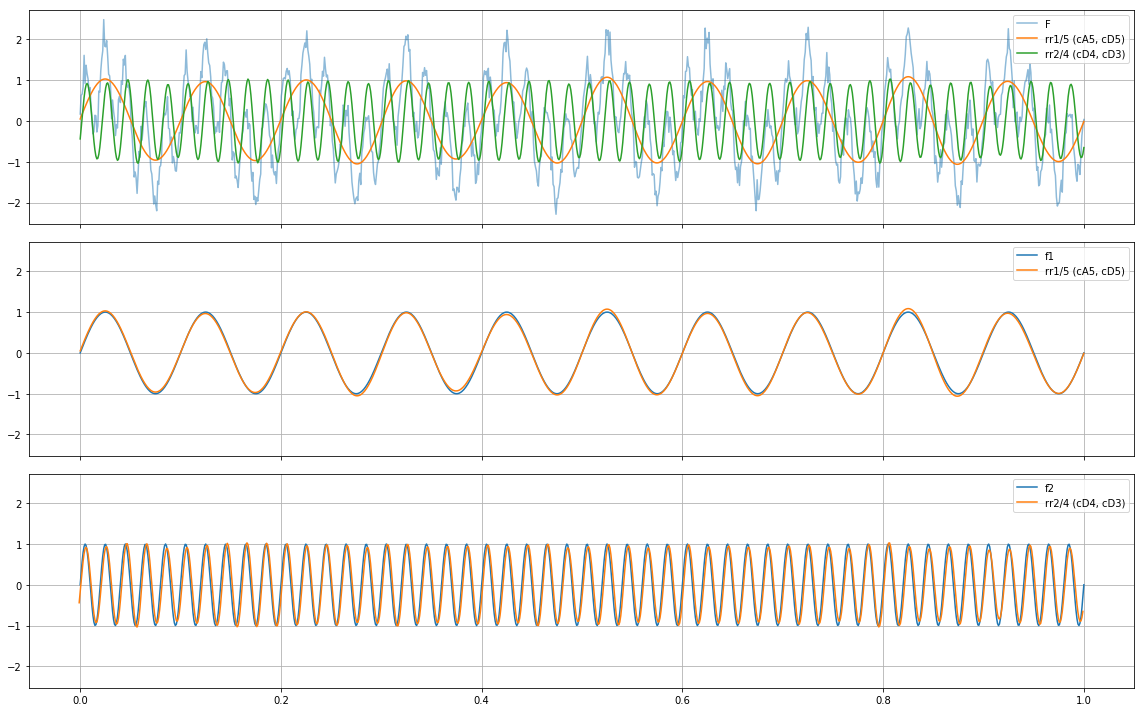

In [1024]:
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, rr1/4, label = 'rr1/5 (cA5, cD5)') # нормируем на уровень 5
ax[0].plot(t, rr2/3, label = 'rr2/4 (cD4, cD3)') # нормируем на уровень 4

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, rr1/4, label = 'rr1/5 (cA5, cD5)')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t-0.001, rr2/3, label = 'rr2/4 (cD4, cD3)')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()
plt.show()

## db6

In [1025]:
(cA5, cD5),(cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt_db6, level=5)

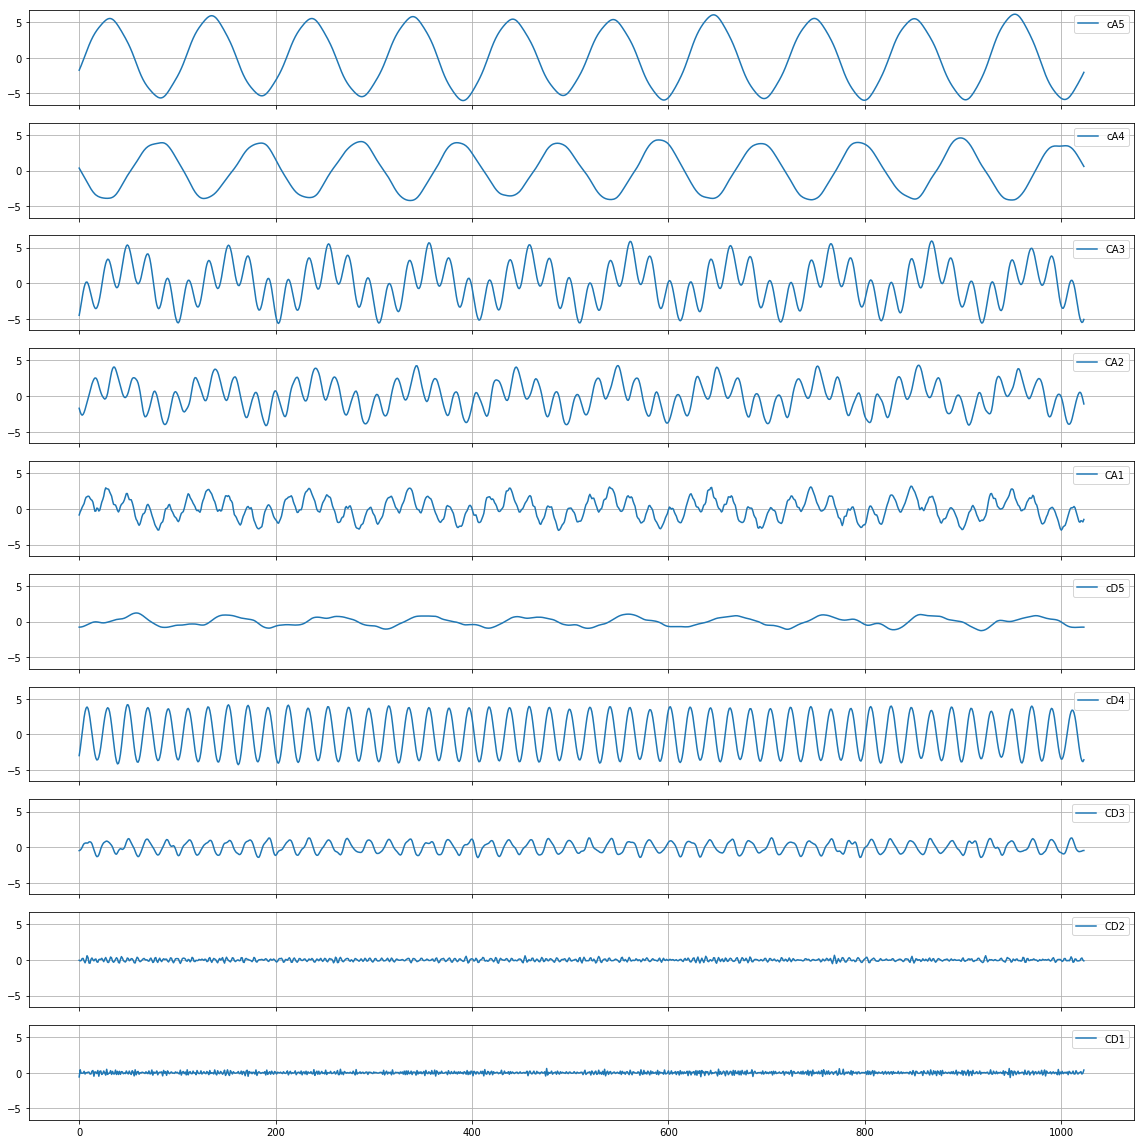

In [1026]:
fig, ax = plt.subplots(10, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA5, label = 'cA5')
ax[1].plot(cA4, label = 'cA4')
ax[2].plot(cA3, label = 'CA3')
ax[3].plot(cA2, label = 'CA2')
ax[4].plot(cA1, label = 'CA1')
ax[5].plot(cD5, label = 'cD5')
ax[6].plot(cD4, label = 'cD4')
ax[7].plot(cD3, label = 'CD3')
ax[8].plot(cD2, label = 'CD2')
ax[9].plot(cD1, label = 'CD1')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()
ax[8].grid()
ax[9].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()
ax[9].legend()


plt.tight_layout()
plt.show()

In [1027]:
rr1 = pywt.iswt([(cA5, cD5)], wvlt_db6)
rr2 = pywt.iswt([(cD4, cD3)], wvlt_db6)

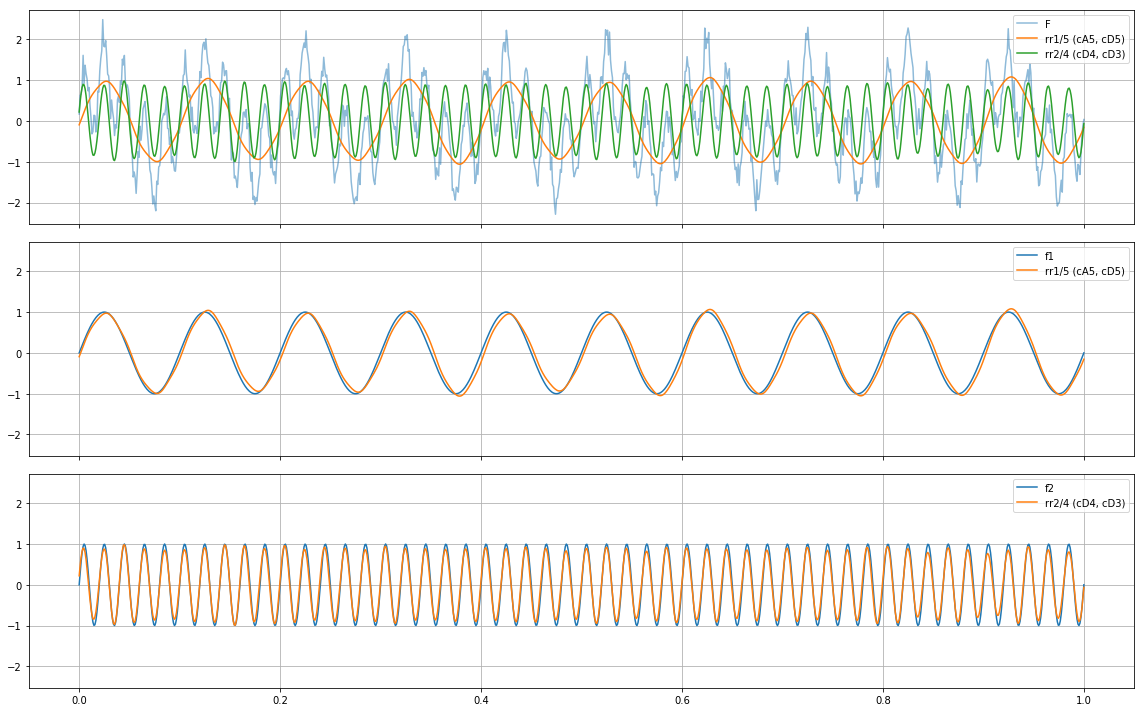

In [1028]:
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, rr1/4, label = 'rr1/5 (cA5, cD5)') # нормируем на уровень 5
ax[0].plot(t, rr2/3, label = 'rr2/4 (cD4, cD3)') # нормируем на уровень 4

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, rr1/4, label = 'rr1/5 (cA5, cD5)')
# -0.016

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, rr2/3, label = 'rr2/4 (cD4, cD3)')
# +0.005

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.tight_layout()
plt.show()

# Wavelet Packet Decomposition = WPD
Пакетная Вейвлет Декомпозиция

Самый мощный инструмент вейвлет-декомпозиции.Этот метод опирается на дискретное преобразование, но позволяет произвести полный перебор
комбинаций коэффициентов аппроксимации a и деталей d. Например,
для 4 уровня это будет 16 комбинаций вида: 'aaaa', 'aaad', 'aada', 'aadd',
'adaa', 'adad', 'adda', 'addd', 'daaa', 'daad', 'dada', 'dadd', 'ddaa', 'ddad', 'ddda', 'dddd'
Для сравнения, на 4 уровне обычной дискретной вейвлет
декомпозиции из пункта 7 доступна только одна комбинация 'addd'.

При таком большом числе возможных вариантов, декомпозиция
представляется в виде бинарного дерева, выборка или удаление узлов
из которого и будет менять после реконструкции полученные
временные ряды. 
## dmey

In [1029]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')]) 
# выводим все комбинации узлов, 
# упорядоченные по их частотной ширине спектра

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


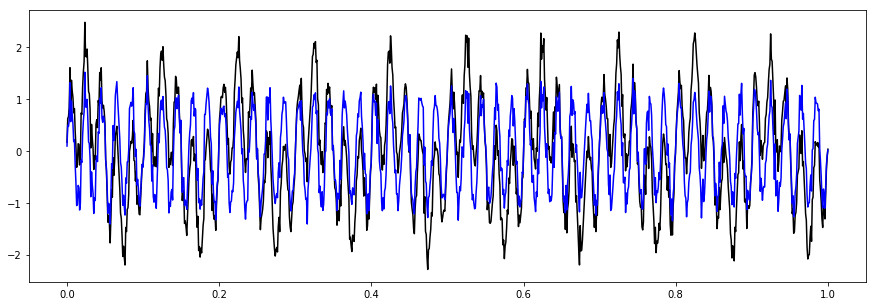

In [1030]:
del wp['aaaa'] # удалим самый «глубокий» узел
reF = wp.reconstruct() # и восстановим ряд …
plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF, 'b') # получим нечто периодическое, плохого качества
plt.show()

Если удаление узлов не приводит к желаемым результатам,
возможно есть смысл делать отдельную выборку ветвей этих узлов:

In [1031]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')

new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2


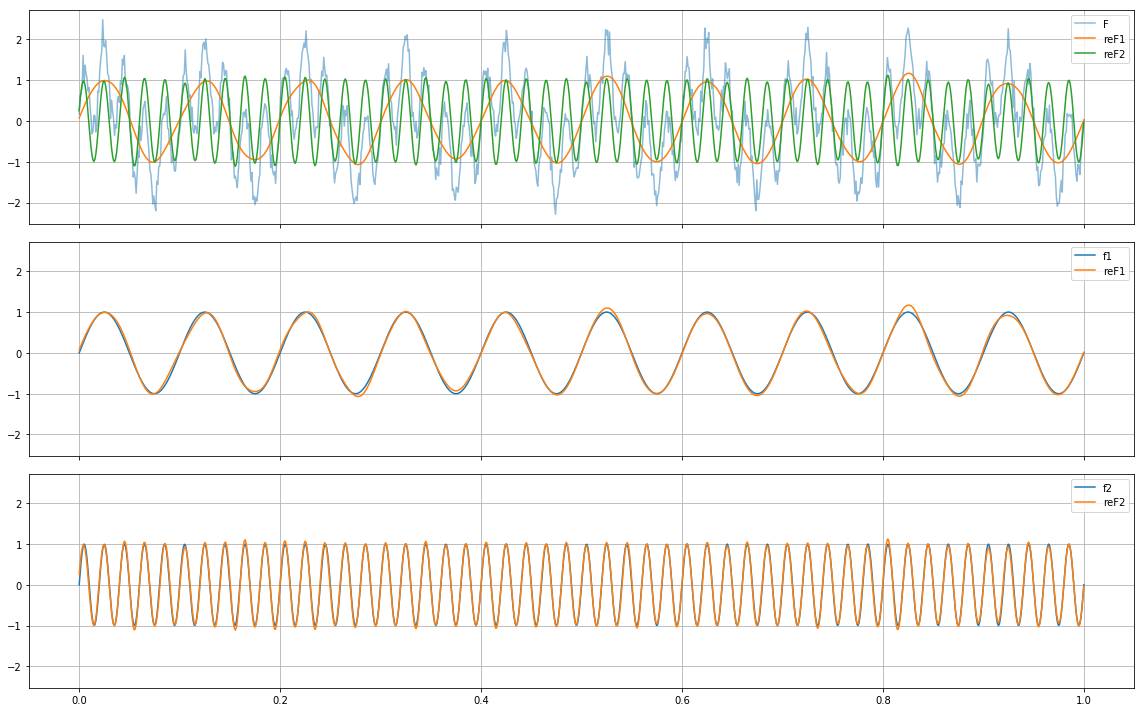

In [1032]:
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, reF1, label = 'reF1') # нормируем на уровень 5
ax[0].plot(t, reF2, label = 'reF2') # нормируем на уровень 4

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, reF1, label = 'reF1')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, reF2, label = 'reF2')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()
plt.show()

## db6

In [1033]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
print([node.path for node in wp.get_level(5, 'freq')]) 
# выводим все комбинации узлов, 
# упорядоченные по их частотной ширине спектра

['aaaaa', 'aaaad', 'aaadd', 'aaada', 'aadda', 'aaddd', 'aadad', 'aadaa', 'addaa', 'addad', 'adddd', 'addda', 'adada', 'adadd', 'adaad', 'adaaa', 'ddaaa', 'ddaad', 'ddadd', 'ddada', 'dddda', 'ddddd', 'dddad', 'dddaa', 'dadaa', 'dadad', 'daddd', 'dadda', 'daada', 'daadd', 'daaad', 'daaaa']


In [1034]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')

new_wp['aaaaa'] = wp['aaaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaaad'] = wp['aaaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2


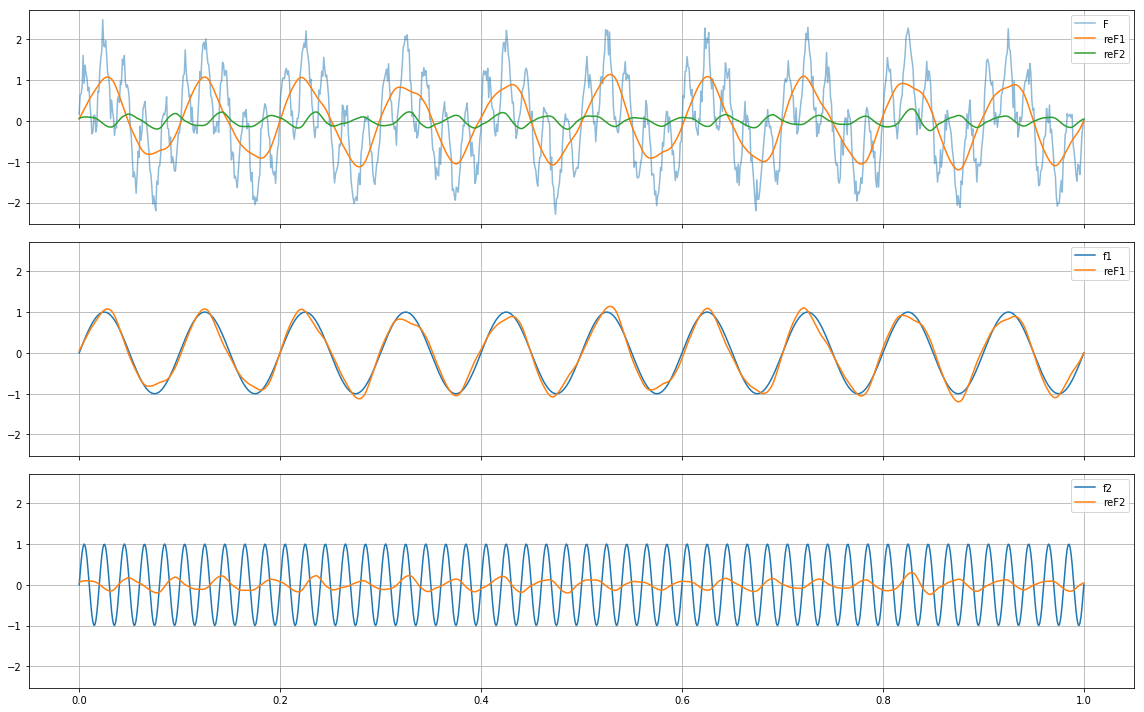

In [1035]:
fig, ax = plt.subplots(3, 1, figsize=(16, 10), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, reF1, label = 'reF1') 
ax[0].plot(t, reF2, label = 'reF2') 

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, reF1, label = 'reF1')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, reF2, label = 'reF2')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()
plt.show()

# db6
## сигнал с частотным изломом 

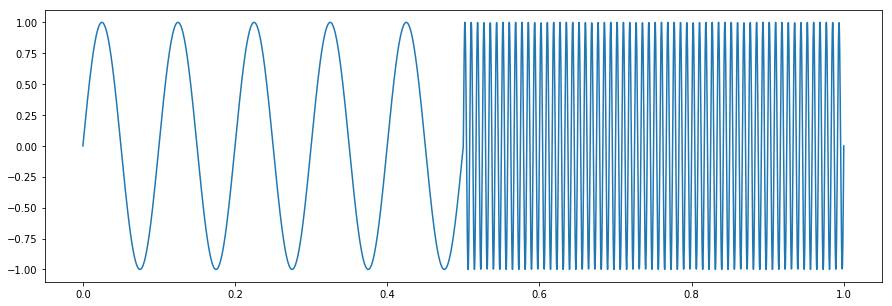

In [1036]:
t = np.linspace(0, 1, 4096)
f1 = 10
f2 = 120
xf = np.zeros(4096)
for i in range(0, len(t)//2):
    xf[i] = np.sin(2*np.pi*f1*t[i])
for i in range(len(t)//2, len(t)):
    xf[i] = np.sin(2*np.pi*f2*t[i])
plt.figure(figsize = (15, 5))
plt.plot(t, xf)
plt.show()

In [1037]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) \
= pywt.swt(xf, wvlt_db6, level=5)

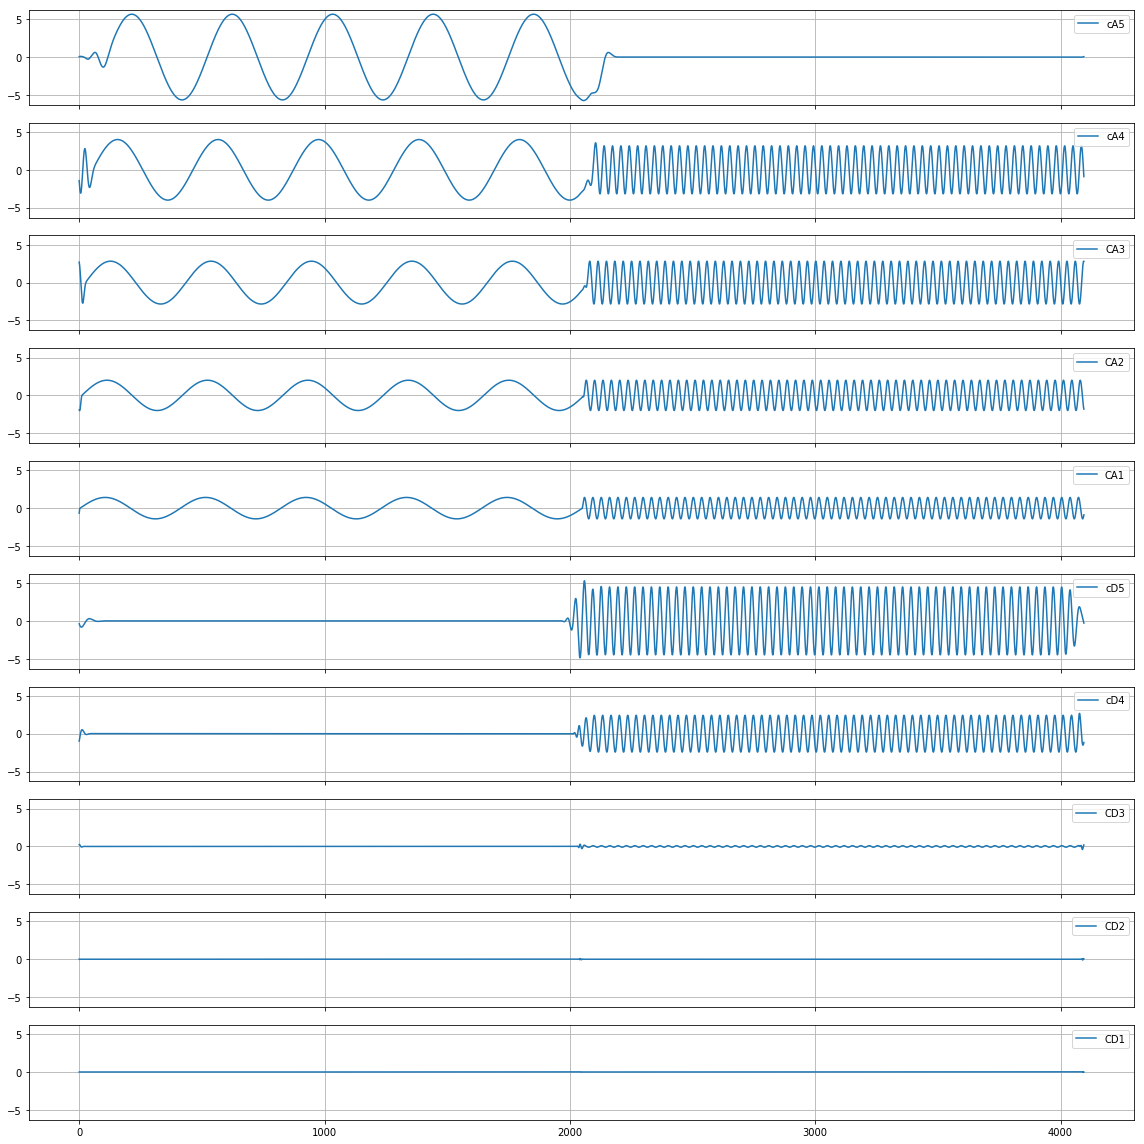

In [1038]:
fig, ax = plt.subplots(10, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA5, label = 'cA5')
ax[1].plot(cA4, label = 'cA4')
ax[2].plot(cA3, label = 'CA3')
ax[3].plot(cA2, label = 'CA2')
ax[4].plot(cA1, label = 'CA1')
ax[5].plot(cD5, label = 'cD5')
ax[6].plot(cD4, label = 'cD4')
ax[7].plot(cD3, label = 'CD3')
ax[8].plot(cD2, label = 'CD2')
ax[9].plot(cD1, label = 'CD1')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()
ax[8].grid()
ax[9].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()
ax[9].legend()


plt.tight_layout()
plt.show()

# wavedec

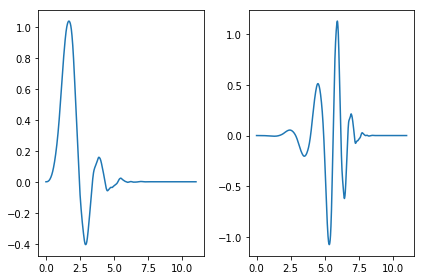

In [1039]:
wavelet = wvlt_db6
data = wavelet.wavefun(10)

funcs, x = data[:-1], data[-1]
labels = ["scaling function (phi)", "wavelet function (psi)"]
fig = plt.figure()
for i, (d, label) in enumerate(zip(funcs, labels)):
    ax = fig.add_subplot((len(data) - 1) // 2, 2, 1 + i)
    ax.plot(x, d)
plt.tight_layout()
plt.show()

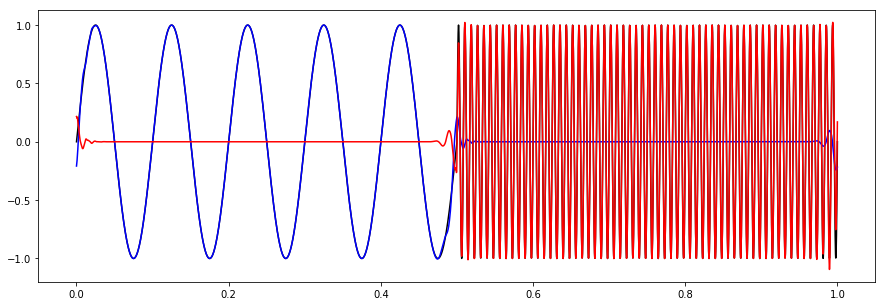

In [1040]:
cA5, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(xf, wavelet, mode='periodization', level=5)
Fre1 = pywt.waverec((cA5,None, None, None, None, None), wavelet, mode='periodization')
Fre2 = pywt.waverec((None, cD5, cD4, cD3, None, None), wavelet, mode='periodization')
plt.figure(figsize = (15, 5))
plt.plot(t, xf, 'k')
plt.plot(t, Fre1, 'b')
plt.plot(t, Fre2, 'r')
plt.show()

#### level 4 недостаточно

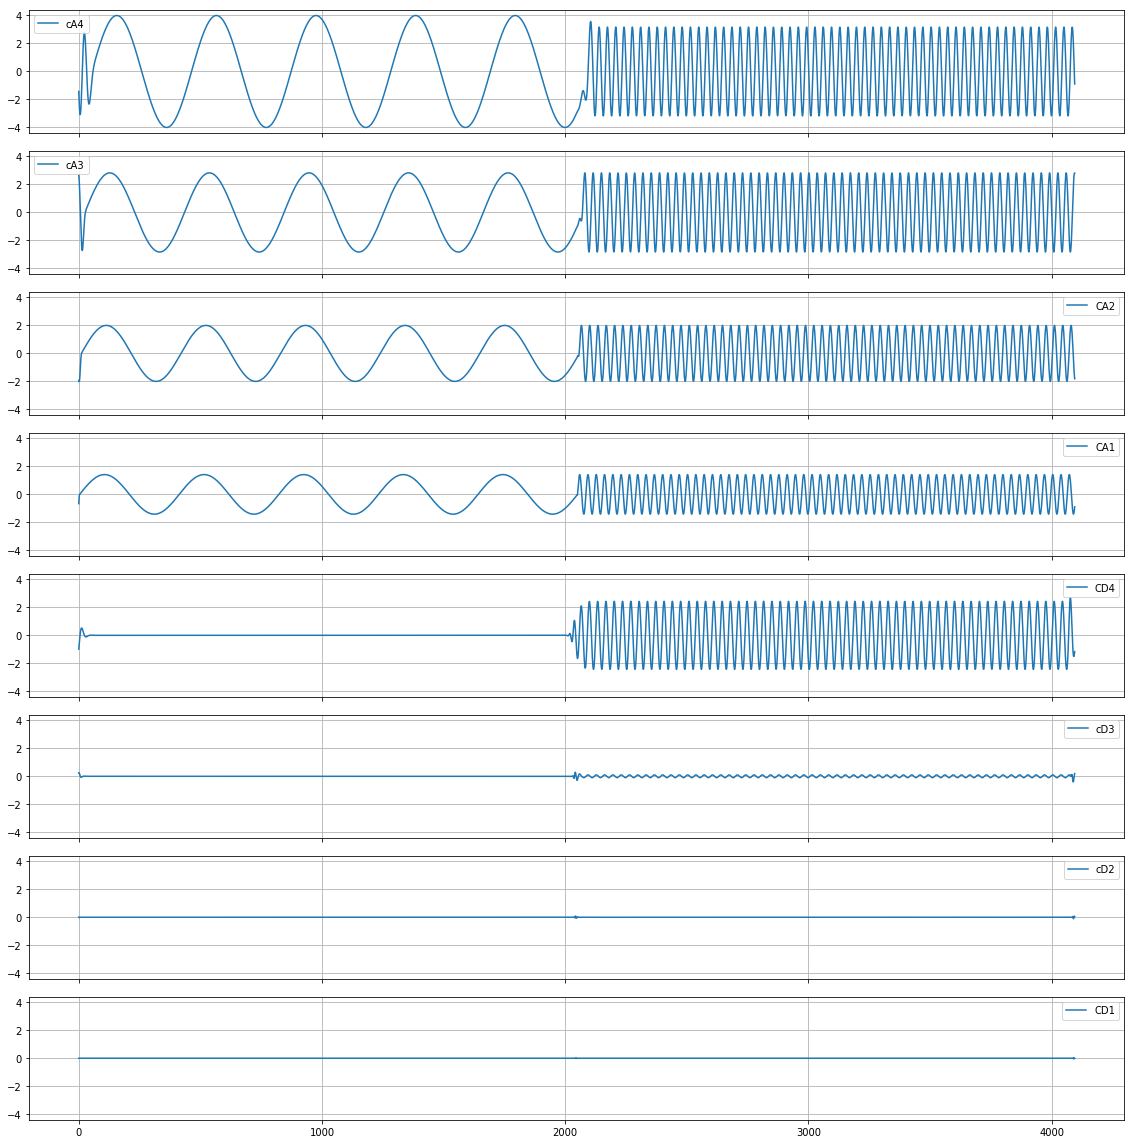

In [1041]:
(cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) \
= pywt.swt(xf, wvlt_db6, level=4)
fig, ax = plt.subplots(8, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA4, label = 'cA4')
ax[1].plot(cA3, label = 'cA3')
ax[2].plot(cA2, label = 'CA2')
ax[3].plot(cA1, label = 'CA1')
ax[4].plot(cD4, label = 'CD4')
ax[5].plot(cD3, label = 'cD3')
ax[6].plot(cD2, label = 'cD2')
ax[7].plot(cD1, label = 'CD1')


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()


plt.tight_layout()
plt.show()

In [1042]:
wp = pywt.WaveletPacket(data=xf, wavelet='db6', mode='periodization')
print([node.path for node in wp.get_level(5, 'freq')]) 

['aaaaa', 'aaaad', 'aaadd', 'aaada', 'aadda', 'aaddd', 'aadad', 'aadaa', 'addaa', 'addad', 'adddd', 'addda', 'adada', 'adadd', 'adaad', 'adaaa', 'ddaaa', 'ddaad', 'ddadd', 'ddada', 'dddda', 'ddddd', 'dddad', 'dddaa', 'dadaa', 'dadad', 'daddd', 'dadda', 'daada', 'daadd', 'daaad', 'daaaa']


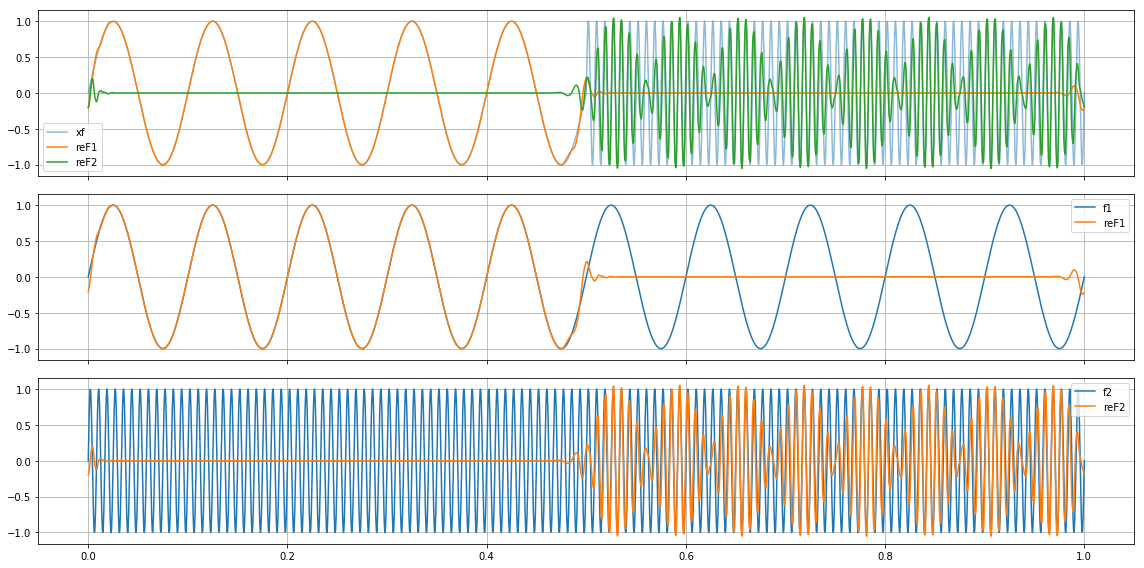

In [1043]:
wp = pywt.WaveletPacket(data=xf, wavelet='db6', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')

new_wp['aaaaa'] = wp['aaaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaaad'] = wp['aaaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2

fig, ax = plt.subplots(3, 1, figsize=(16, 8), sharex = True, sharey=True)
ax[0].plot(t, xf, alpha = 0.5, label = 'xf')
ax[0].plot(t, reF1, label = 'reF1') 
ax[0].plot(t, reF2, label = 'reF2') 

ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, reF1, label = 'reF1')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, reF2, label = 'reF2')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()
plt.show()

## экспоненциальный тренд 

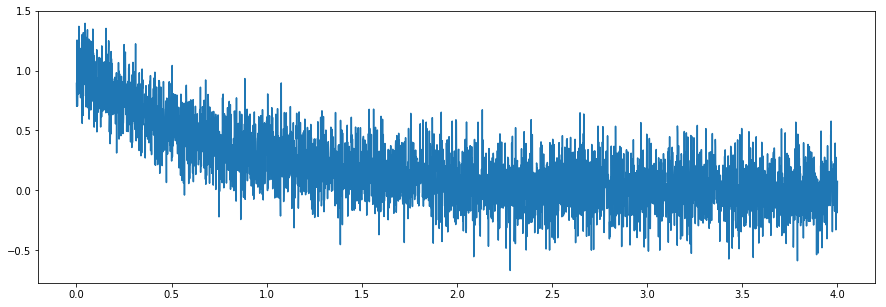

In [1044]:
t = np.linspace(0, 4, 4096)
Fexp = np.exp(-0.4*np.pi*t) + 0.2*rand.randn(len(t))
plt.figure(figsize = (15, 5))
plt.plot(t, Fexp)
plt.show()

In [1045]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) \
= pywt.swt(Fexp, wvlt_db6, level=5)

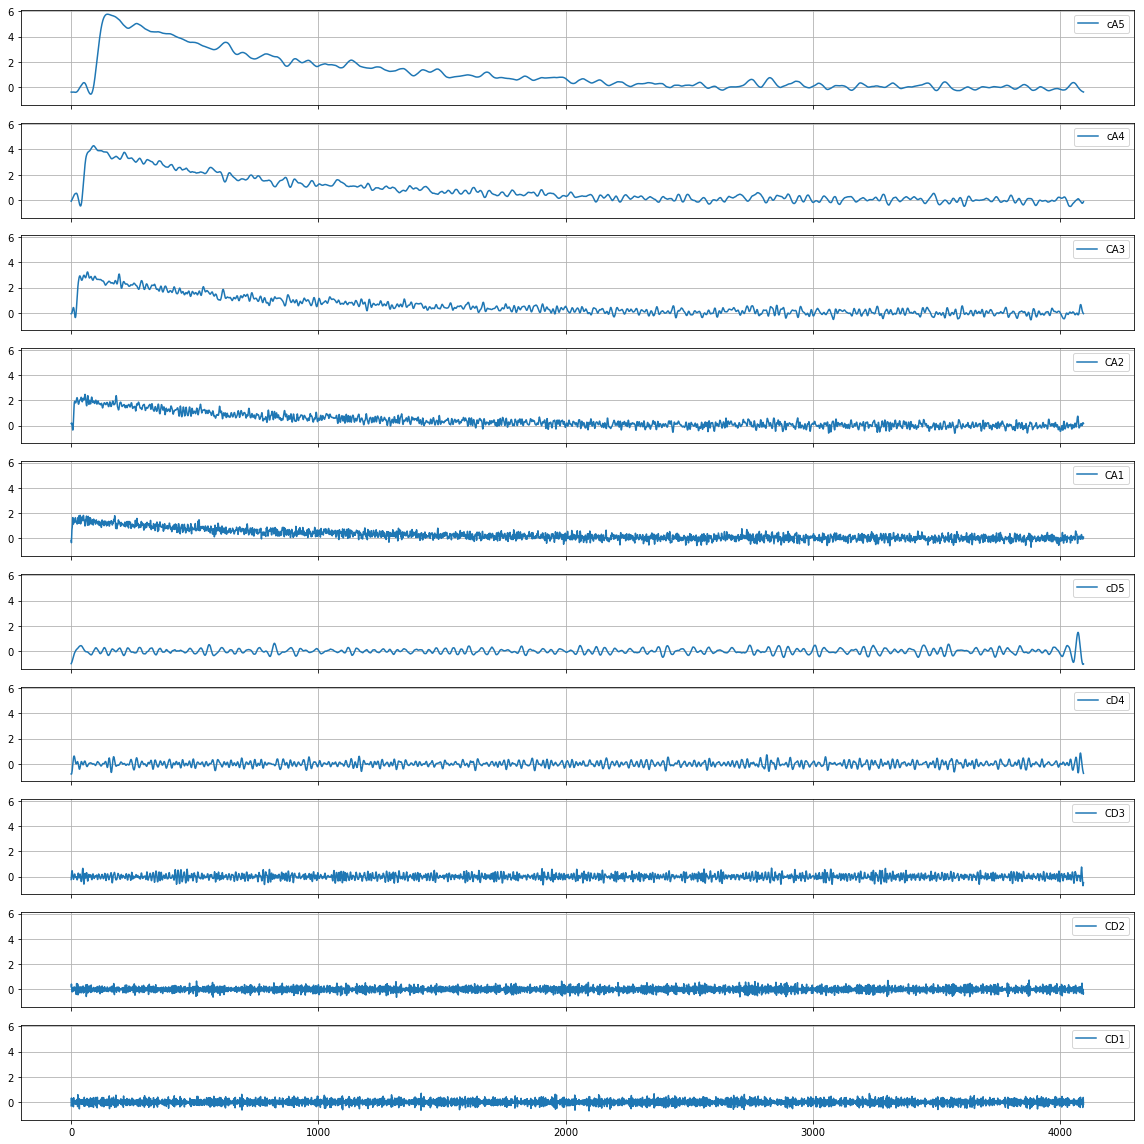

In [1046]:
fig, ax = plt.subplots(10, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA5, label = 'cA5')
ax[1].plot(cA4, label = 'cA4')
ax[2].plot(cA3, label = 'CA3')
ax[3].plot(cA2, label = 'CA2')
ax[4].plot(cA1, label = 'CA1')
ax[5].plot(cD5, label = 'cD5')
ax[6].plot(cD4, label = 'cD4')
ax[7].plot(cD3, label = 'CD3')
ax[8].plot(cD2, label = 'CD2')
ax[9].plot(cD1, label = 'CD1')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()
ax[8].grid()
ax[9].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()
ax[9].legend()


plt.tight_layout()
plt.show()

### level 4

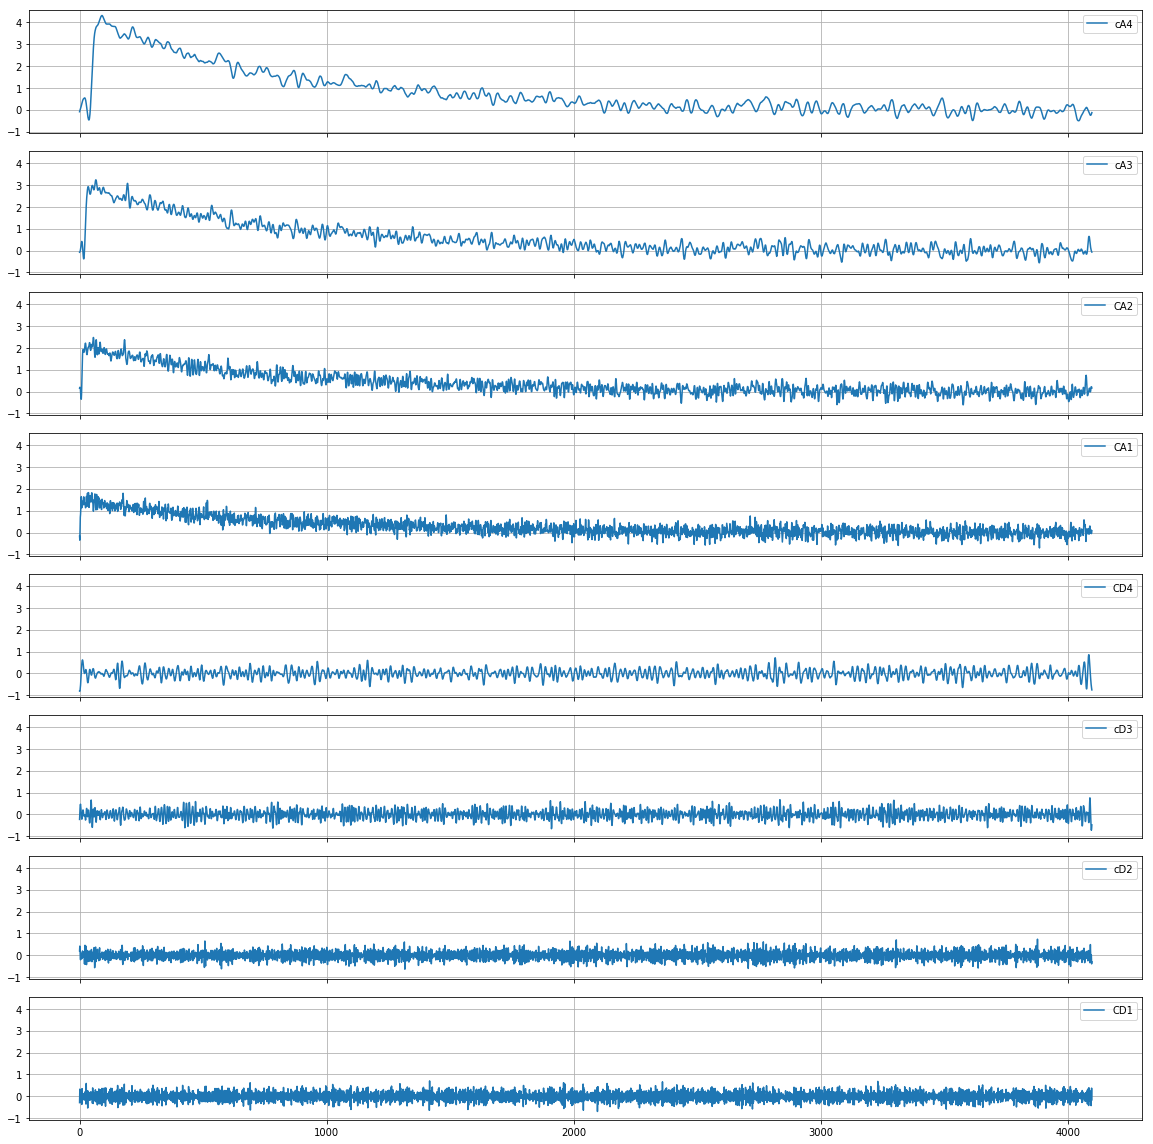

In [1047]:
(cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) \
= pywt.swt(Fexp, wvlt_db6, level=4)
fig, ax = plt.subplots(8, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA4, label = 'cA4')
ax[1].plot(cA3, label = 'cA3')
ax[2].plot(cA2, label = 'CA2')
ax[3].plot(cA1, label = 'CA1')
ax[4].plot(cD4, label = 'CD4')
ax[5].plot(cD3, label = 'cD3')
ax[6].plot(cD2, label = 'cD2')
ax[7].plot(cD1, label = 'CD1')


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()


plt.tight_layout()
plt.show()

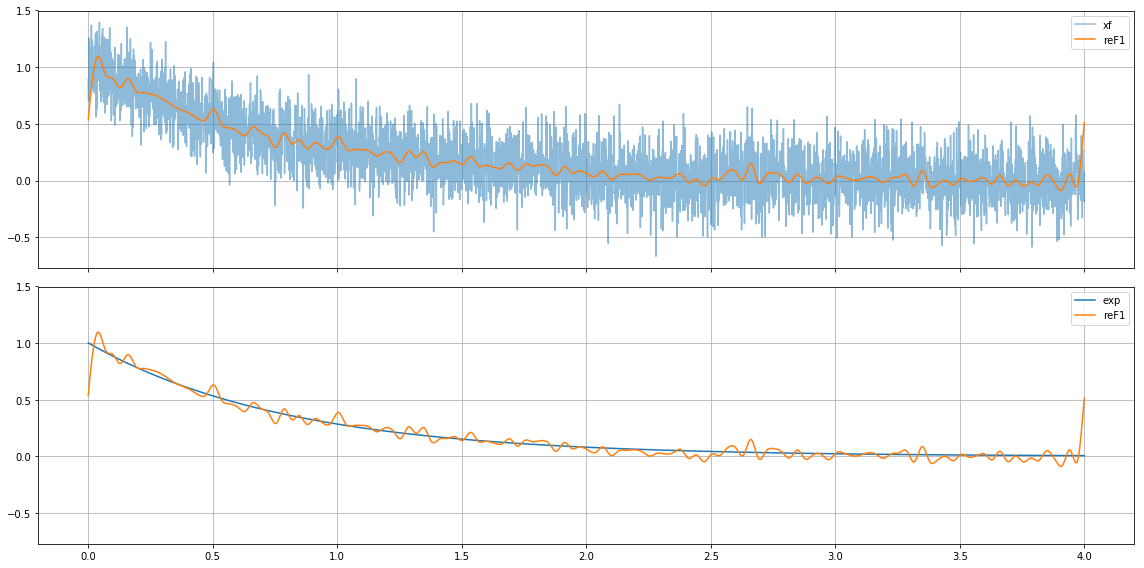

In [1048]:
wp = pywt.WaveletPacket(data=Fexp, wavelet='coif5', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='coif5', mode='periodization')

new_wp['aaaaa'] = wp['aaaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex = True, sharey=True)
ax[0].plot(t, Fexp, alpha = 0.5, label = 'xf')
ax[0].plot(t, reF1, label = 'reF1') 

ax[1].plot(t, np.exp(-0.4*np.pi*t), label = 'exp')
ax[1].plot(t, reF1, label = 'reF1')

ax[0].grid()
ax[1].grid()

ax[0].legend()
ax[1].legend()


plt.tight_layout()
plt.show()

## 4 гармоники

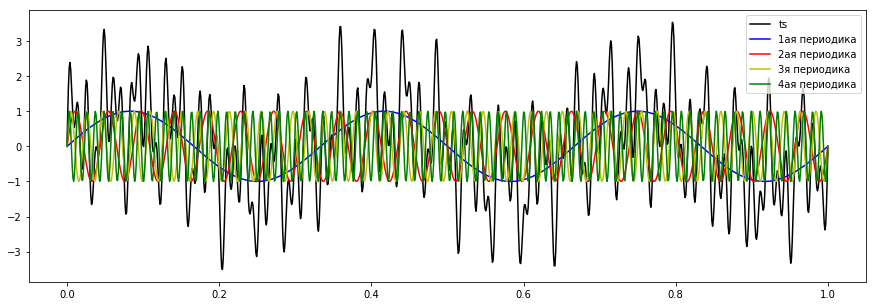

In [1049]:
t = np.linspace(0, 1, 1024)
f1 = 3 #3
f2 = 23 #23
f3 = 48 #48
f4 = 87 #90
F = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) \
    + np.sin(2*np.pi*f3*t) + np.sin(2*np.pi*f4*t) + 0.01*rand.randn(len(t))


plt.figure(figsize = (15, 5))
plt.plot(t, F, 'k', label = 'ts')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b', label = '1ая периодика')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r', label = '2ая периодика')
plt.plot(t, np.sin(2*np.pi*f3*t), 'y', label = '3я периодика')
plt.plot(t, np.sin(2*np.pi*f4*t), 'g', label = '4ая периодика')
plt.legend()
plt.show()

In [1050]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) \
= pywt.swt(F, wvlt_db6, level=5)

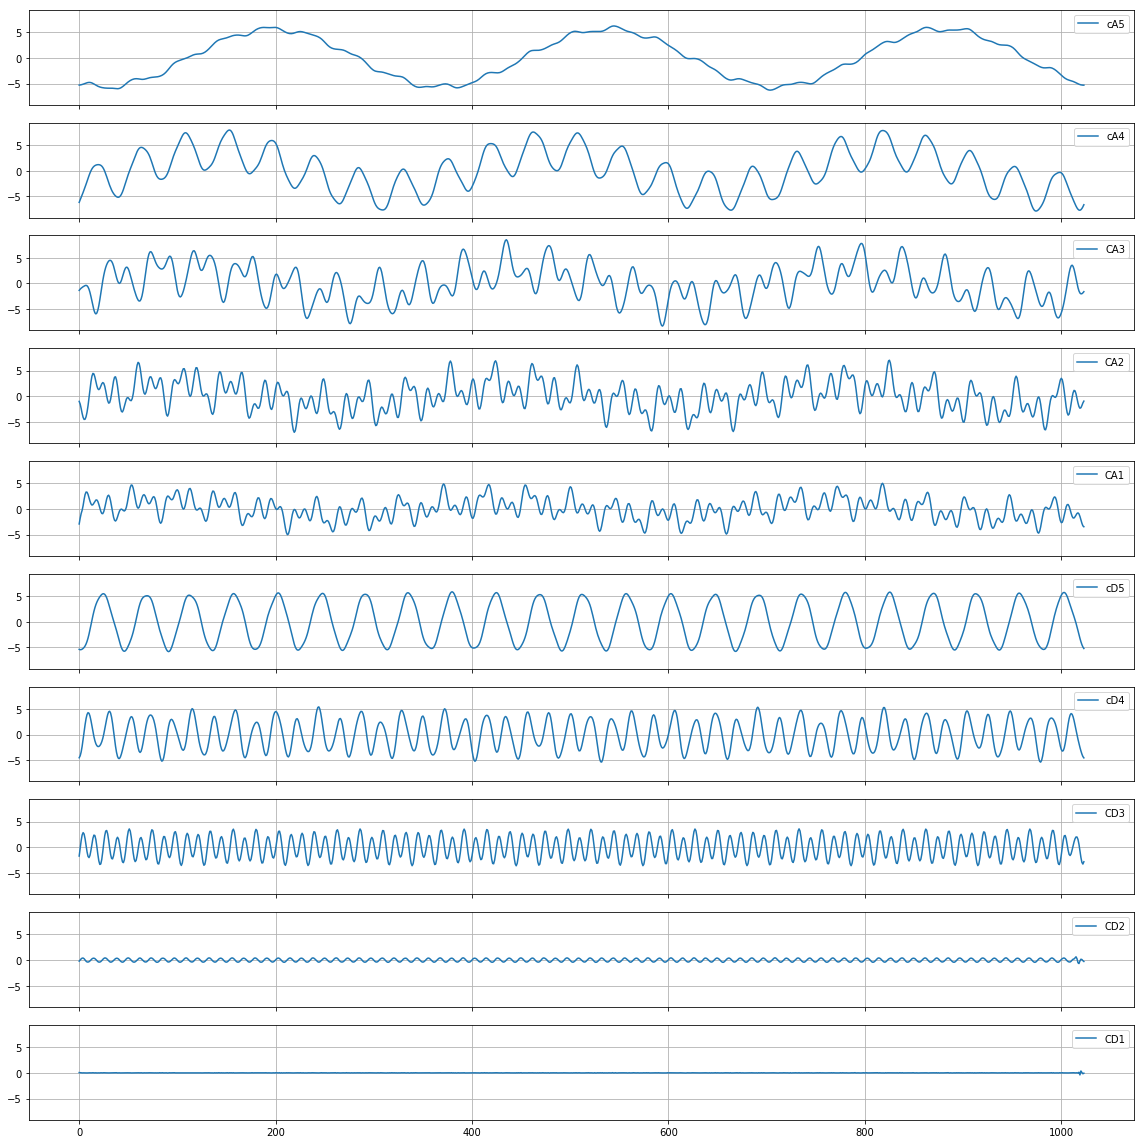

In [1051]:
fig, ax = plt.subplots(10, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA5, label = 'cA5')
ax[1].plot(cA4, label = 'cA4')
ax[2].plot(cA3, label = 'CA3')
ax[3].plot(cA2, label = 'CA2')
ax[4].plot(cA1, label = 'CA1')
ax[5].plot(cD5, label = 'cD5')
ax[6].plot(cD4, label = 'cD4')
ax[7].plot(cD3, label = 'CD3')
ax[8].plot(cD2, label = 'CD2')
ax[9].plot(cD1, label = 'CD1')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()
ax[8].grid()
ax[9].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()
ax[9].legend()


plt.tight_layout()
plt.show()

In [1052]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
print([node.path for node in wp.get_level(5, 'freq')]) 

['aaaaa', 'aaaad', 'aaadd', 'aaada', 'aadda', 'aaddd', 'aadad', 'aadaa', 'addaa', 'addad', 'adddd', 'addda', 'adada', 'adadd', 'adaad', 'adaaa', 'ddaaa', 'ddaad', 'ddadd', 'ddada', 'dddda', 'ddddd', 'dddad', 'dddaa', 'dadaa', 'dadad', 'daddd', 'dadda', 'daada', 'daadd', 'daaad', 'daaaa']


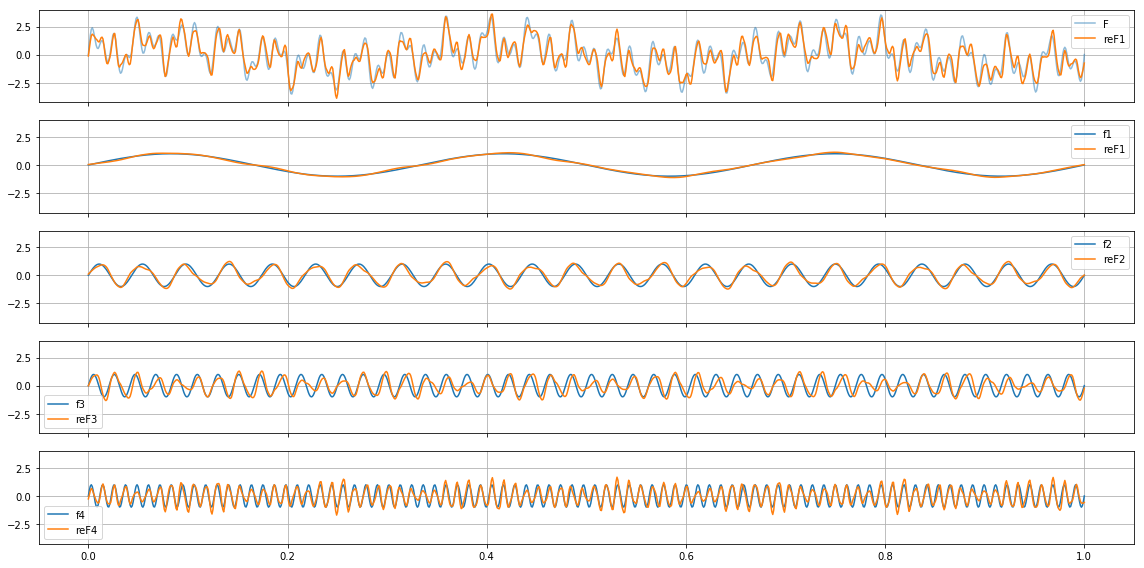

In [1053]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')

new_wp['aaaaa'] = wp['aaaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaaad'] = wp['aaaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaadd'] = wp['aaadd'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF3 = new_wp.data # восстанавливаем под нее ряд 2

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaddd'] = wp['aaddd'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF4 = new_wp.data # восстанавливаем под нее ряд 2

fig, ax = plt.subplots(5, 1, figsize=(16, 8), sharex = True, sharey=True)
ax[0].plot(t, F, alpha = 0.5, label = 'F')
ax[0].plot(t, reF1+reF2+reF3+reF4, label = 'reF1') 
#ax[0].plot(t, reF2, label = 'reF2') 
#ax[0].plot(t, reF3, label = 'reF3') 
#ax[0].plot(t, reF4, label = 'reF4') 


ax[1].plot(t, np.sin(2*np.pi*f1*t), label = 'f1')
ax[1].plot(t, reF1, label = 'reF1')

ax[2].plot(t, np.sin(2*np.pi*f2*t), label = 'f2')
ax[2].plot(t, reF2, label = 'reF2')

ax[3].plot(t, np.sin(2*np.pi*f3*t), label = 'f3')
ax[3].plot(t, reF3, label = 'reF3')

ax[4].plot(t, np.sin(2*np.pi*f4*t), label = 'f4')
ax[4].plot(t, reF4, label = 'reF4')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.tight_layout()
plt.show()

## doppler.mat

In [1054]:
file = h5py.File('doppler.mat','r')
data = file.get('data')
data = np.array(data)
data = data.reshape(1024)
t = np.linspace(0, 1, 1024)
plt.figure(figsize = (15, 5))
plt.plot(t, data, 'k')
plt.show()

OSError: Unable to open file (unable to open file: name = 'doppler.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) \
= pywt.swt(data, wvlt_db6, level=5)

In [ ]:
fig, ax = plt.subplots(10, 1, figsize=(16, 16), sharex = True, sharey=True)
ax[0].plot(cA5, label = 'cA5')
ax[1].plot(cA4, label = 'cA4')
ax[2].plot(cA3, label = 'CA3')
ax[3].plot(cA2, label = 'CA2')
ax[4].plot(cA1, label = 'CA1')
ax[5].plot(cD5, label = 'cD5')
ax[6].plot(cD4, label = 'cD4')
ax[7].plot(cD3, label = 'CD3')
ax[8].plot(cD2, label = 'CD2')
ax[9].plot(cD1, label = 'CD1')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()
ax[8].grid()
ax[9].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()
ax[9].legend()


plt.tight_layout()
plt.show()

In [ ]:
wp = pywt.WaveletPacket(data=data, wavelet='db6', mode='periodization')
print([node.path for node in wp.get_level(5, 'freq')]) 

In [ ]:
wp = pywt.WaveletPacket(data=data, wavelet='db6', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')

new_wp['aaaaa'] = wp['aaaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaaad'] = wp['aaaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
#new_wp['aaada'] = wp['aaada'].data # выбираем вторую ветвь
new_wp['aaadd'] = wp['aaadd'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF3 = new_wp.data # восстанавливаем под нее ряд 2

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
#new_wp['aadaa'] = wp['aadaa'].data # выбираем вторую ветвь
new_wp['aaada'] = wp['aaada'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF4 = new_wp.data # восстанавливаем под нее ряд 2

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
#new_wp['adaaa'] = wp['adaaa'].data # выбираем вторую ветвь
new_wp['aadda'] = wp['aadda'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF5 = new_wp.data # восстанавливаем под нее ряд 2

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
#new_wp['daaaa'] = wp['daaaa'].data # выбираем вторую ветвь
new_wp['aaddd'] = wp['aaddd'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF6 = new_wp.data # восстанавливаем под нее ряд 2

fig, ax = plt.subplots(7, 1, figsize=(16, 12), sharex = True, sharey=True)
ax[0].plot(t, data, alpha = 0.5, label = 'F')
ax[0].plot(t, reF1+reF2+reF3+reF4+reF5+reF6, label = 'sum') 
#ax[0].plot(t, reF1+reF4, label = 'sum') 

ax[1].plot(t, data, alpha = 0.5, label = 'F')
ax[1].plot(t, reF1, label = 'reF1')

ax[2].plot(t, data, alpha = 0.5, label = 'F')
ax[2].plot(t, reF2, label = 'reF2')

ax[3].plot(t, data, alpha = 0.5, label = 'F')
ax[3].plot(t, reF3, label = 'reF3')

ax[4].plot(t, data, alpha = 0.5, label = 'F')
ax[4].plot(t, reF4, label = 'reF4')

ax[5].plot(t, data, alpha = 0.5, label = 'F')
ax[5].plot(t, reF5, label = 'reF5')

ax[6].plot(t, data, alpha = 0.5, label = 'F')
ax[6].plot(t, reF6, label = 'reF6')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
plt.tight_layout()
plt.show()

In [ ]:
print([node.path for node in wp.get_level(5, 'natural')]) 

In [ ]:
print([node.path for node in wp.get_level(5, 'freq')]) 

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(16, 8), sharex = True, sharey=True)

ax[0].plot(np.linspace(0, 1, 1024), data, label = 'reF1')
ax[0].plot(np.linspace(0, 1, 512), wp['a'].data, label = 'a')
ax[1].plot(np.linspace(0, 1, 256), wp['aa'].data, label = 'aa')
ax[2].plot(np.linspace(0, 1, 128), wp['aaa'].data, label = 'aaa')
ax[3].plot(np.linspace(0, 1, 64), wp['aaaa'].data, label = 'aaaa')
ax[4].plot(np.linspace(0, 1, 32), wp['aaaaa'].data, label = 'aaaaa')


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()


ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.tight_layout()
plt.show()